# Drawing Pseudo-Hilbert Curves

### Setting starting parameters (and imports)

In [1]:
import numpy as np

square_h = 8  #size of one square(px)
line_w = 1    #width of the line (px)

### Drawing starting image (First-order Pseudo-Hilbert Curve)

In [2]:
def draw_start() -> np.ndarray:
    PHC = np.zeros((square_h, square_h))
    PHC[0:line_w, :] = 1
    PHC[:, 0:line_w] = 1
    PHC[:, square_h-line_w] = 1
    return PHC

### Drawing next-order curves

In [3]:
def draw_next(previous_PHC: np.ndarray):
    prev_h = previous_PHC.shape[0]
    new_H = prev_h*2 + square_h
    new_PHC = np.zeros((new_H, new_H))
    
    new_PHC[0:prev_h, 0:prev_h] = previous_PHC
    new_PHC[0:prev_h, prev_h+square_h:] = previous_PHC
    new_PHC[prev_h-line_w:prev_h, prev_h:prev_h+ square_h ] = 1
    
    new_PHC[prev_h+square_h:, 0:prev_h] = previous_PHC.T[:, ::-1]
    new_PHC[prev_h+square_h:, prev_h+square_h:] = previous_PHC.T
    new_PHC[prev_h:prev_h+square_h, 0:line_w ] = 1
    new_PHC[prev_h:prev_h+square_h, -line_w: ] = 1

    return new_PHC

### Drawing Pseudo-Hilbert Curves of exact order

In [4]:
def draw_pseudohilbert_curve(hilbert_order: int):
    PHC = draw_start()
    for i in range(hilbert_order-1):
        PHC = draw_next(PHC)
    return PHC

### Results

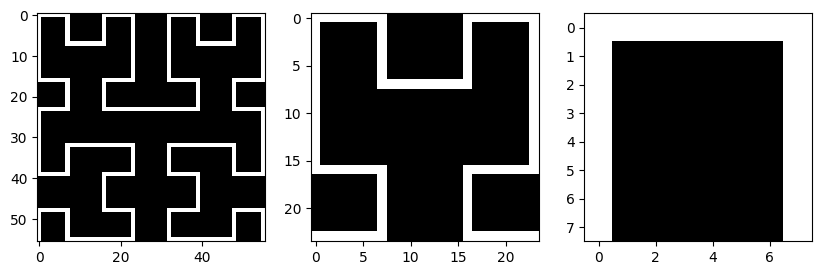

In [5]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(10, 10))
curve_1 = draw_start()
curve_2 = draw_next(curve_1)
curve_3 = draw_pseudohilbert_curve(3)
ax1.imshow(curve_3, cmap="gray")
ax2.imshow(curve_2, cmap="gray")
ax3.imshow(curve_1, cmap="gray")

#### Saving images

In [6]:
hilbert_order = 4
PHC = draw_pseudohilbert_curve(hilbert_order)
plt.imsave(f"./saved_images/PHC-{hilbert_order}.png", PHC, cmap="gray")